In [1]:
print('#1.[9 pts] Fill in the missing latitude and longitude values by calculating the average for that country. Round the average to 2 decimal places.')
import csv
from pandas import DataFrame
from pandas import Series
import numpy as np
from collections import defaultdict
from collections import Counter
from matplotlib import pyplot as plt
import random
def coordDictionary(f):
    latitudes = defaultdict(list)
    longitudes = defaultdict(list)
    reader = csv.DictReader(open(f))
    for index, row in enumerate(reader):
        if row['latitude'] != '':
            latitudes[row['country']].append(float(row['latitude']))
        if row['longitude'] != '':
            longitudes[row['country']].append(float(row['longitude']))
    latitudes = [(province,round(sum(lats)/len(lats),2)) for province,lats in latitudes.items()]
    longitudes = [(province,round(sum(longs)/len(longs),2)) for province,longs in longitudes.items()]
    return dict(latitudes),dict(longitudes)


f = 'EuCitiesTemperatures.csv'
latDict,longDict = coordDictionary(f)
reader = csv.DictReader(open(f))
tDF = DataFrame(reader)
for i,row in tDF.iterrows():
    if(row['latitude'] == ''):
        row['latitude'] = latDict[row['country']]
    else:
        row['latitude'] = float(row['latitude'])
    if(row['longitude'] == ''):
        row['longitude'] = longDict[row['country']]
    else:
        row['longitude'] = float(row['longitude'])
display(tDF)

#1.[9 pts] Fill in the missing latitude and longitude values by calculating the average for that country. Round the average to 2 decimal places.


,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.9,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.5,1.52,
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,
209,Exeter,United Kingdom,65.11,yes,yes,50.7,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.0
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.6


In [2]:
print('#2. Find out the subset of cities that lie between latitudes 40 to 60 (both inclusive) and longitudes 15 to 30 (both inclusive). Find out which countries have the maximum number of cities in this geographical band. (More than one country could have the maximum number of values.)')

llRange = tDF.loc[(tDF['latitude'] >= 40) & (tDF['latitude'] <= 60) & (tDF['longitude'] >= 15) & (tDF['longitude'] <= 30)]
display(llRange.loc[:,['city']])

countryCities = defaultdict(list)
for i,row in llRange.iterrows():
    if(row['city'] not in countryCities[row['country']]):
        countryCities[row['country']].append(row['city'])
countryCitiesList = sorted(countryCities.items(), key = lambda cc:len(cc[1]), reverse = True )
maxCountries = [country for country,cities in countryCitiesList if len(cities) == len(countryCitiesList[0][1])]
print('Countries which have the maximum number of cities in this geographical band: ')
for country in maxCountries:
    print(country)

#2. Find out the subset of cities that lie between latitudes 40 to 60 (both inclusive) and longitudes 15 to 30 (both inclusive). Find out which countries have the maximum number of cities in this geographical band. (More than one country could have the maximum number of values.)


,city
0,Elbasan
6,Vienna
7,Minsk
8,Orsha
9,Pinsk
...,...
165,Bursa
169,Edirne
183,Tekirdag
186,Chernivtsi


Countries which have the maximum number of cities in this geographical band: 
Poland
Romania


In [3]:
print('#3 [10 pts] Fill in the missing temperature values by the average temperature value of the similar region type. A region type would be a combinaton of whether it is in EU (yes/no) and whether it has a coastline (yes/no).')
def tempDictionary(df):
    y = [float(df.loc[i,'temperature']) for i,row in df.iterrows() if df.loc[i,'temperature'] != '']
    return round(sum(y)/len(y),2)
def makeFloat(s):
    return float(s)
both = tDF.loc[(tDF['EU'] == 'yes') & (tDF['coastline'] == 'yes')]
cLine = tDF.loc[(tDF['EU'] == 'no') & (tDF['coastline'] == 'yes')]
eu = tDF.loc[(tDF['EU'] == 'yes') & (tDF['coastline'] == 'no')]
neither = tDF.loc[(tDF['EU'] == 'no') & (tDF['coastline'] == 'no')]
yy = tempDictionary(both)
ny = tempDictionary(cLine)
yn = tempDictionary(eu)
nn = tempDictionary(neither)
for i,row in tDF.iterrows():
    if(row['temperature'] == ''):
        if((row['EU'] == 'yes') and (row['coastline'] == 'yes')):
            row['temperature'] = yy
        elif((row['EU'] == 'no') and (row['coastline'] == 'yes')):
            row['temperature'] = ny
        elif((row['EU'] == 'yes') and (row['coastline'] == 'no')):
            row['temperature'] = yn
        else:
            row['temperature'] = nn
tDF['temperature'] = tDF['temperature'].map(makeFloat)
display(tDF)

#3 [10 pts] Fill in the missing temperature values by the average temperature value of the similar region type. A region type would be a combinaton of whether it is in EU (yes/no) and whether it has a coastline (yes/no).


,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.9,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.5,1.52,7.48
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,10.31
209,Exeter,United Kingdom,65.11,yes,yes,50.7,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


#1. [6 pts] Plot a bar chart for the number of cities belonging to each of the regions described in Preprocessing/Analysis #3 above.


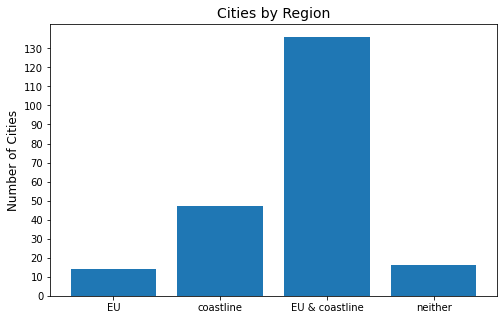

In [4]:
print("#1. [6 pts] Plot a bar chart for the number of cities belonging to each of the regions described in Preprocessing/Analysis #3 above.")
# alternatively, can give a numeric range for xticks, and map labels to the tick numbers
cols = ['EU','coastline','EU & coastline', 'neither']
numCities = [len(eu),len(cLine),len(both),len(neither)] 
plt.figure(figsize=(8,5))
plt.bar(range(len(numCities)), numCities)
plt.xticks(range(len(numCities)),cols)  # first arg is numeric set, second is mapped labels
plt.yticks(range(0,max(numCities),10))
plt.ylabel('Number of Cities',fontsize=12)
plt.title('Cities by Region',fontsize=14)
plt.show()

#2 [7 pts] Plot a scatter plot of latitude (y-axis) v/s longitude (x-axis) values to get a map-like visual of the cities under consideration. All the cities in the same country should have the same color.


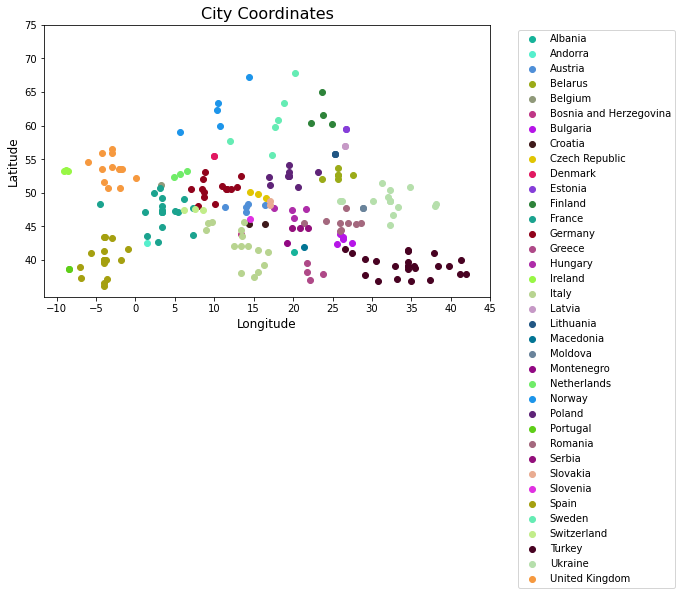

In [10]:
print("#2 [7 pts] Plot a scatter plot of latitude (y-axis) v/s longitude (x-axis) values to get a map-like visual of the cities under consideration. All the cities in the same country should have the same color.")
countryLatitudes = defaultdict(list)
countryLongitudes = defaultdict(list)
for i,row in tDF.iterrows():
    countryLatitudes[row['country']].append(row['latitude'])
    countryLongitudes[row['country']].append(row['longitude'])


minLat,maxLat = int(min(tDF['latitude'].values)),int(max(tDF['latitude'].values))
minLong,maxLong = int(min(tDF['longitude'].values)),int(max(tDF['longitude'].values))

plt.figure(figsize=(8,5))
colorList = []
for country in countryLongitudes.keys():
    randomColor = (random.random(),random.random(),random.random())
    while(randomColor in colorList):
        randomColor = (random.random(),random.random(),random.random())
    colorList.append(randomColor)
    plt.scatter(countryLongitudes[country],countryLatitudes[country],label=country,color=randomColor)

plt.yticks(range(round(minLat/10)*10,round(maxLat/10 + 1)*10,5))
plt.xticks(range(round(minLong/10)*10,round(maxLong/10 + 1)*10,5))
plt.legend(bbox_to_anchor=(1.05, 1))
plt.ylabel('Latitude',fontsize=12)
plt.xlabel('Longitude',fontsize=12)
plt.title('City Coordinates',fontsize=16)
plt.show()

#3. [6 pts] The population column contains values unique to each country. So two cities of the same country will show the same population value. Plot a histogram of the number of countries belonging to each population group: split the population values into 5 bins (groups).


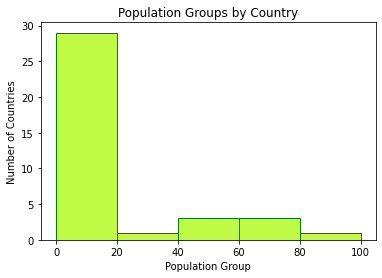

In [21]:
print("#3. [6 pts] The population column contains values unique to each country. So two cities of the same country will show the same population value. Plot a histogram of the number of countries belonging to each population group: split the population values into 5 bins (groups).")
tDF['population'] = tDF['population'].map(makeFloat)
countriesAndpopulations = tDF.loc[:,['country','population']]

def populations(df):
    cpDict = {}
    for i,row in df.iterrows():
        cpDict[row['country']]=row['population']
    return cpDict.values()
countryPop = populations(tDF)
plt.title('Population Groups by Country')
plt.xlabel('Population Group')
plt.ylabel('Number of Countries')
plt.hist(countryPop,bins=range(0,100+1,20),color='#bffa45',edgecolor='green')
plt.show()

#4 [8 pts] Plot subplots (2, 2), with proper titles, one each for the region types described in Preprocessing/Analysis #3 above.
Each subplot should be a scatter plot of Latitude (y-axis) vs. City (x-axis), where the color of the plot points should be based on the temperature values: ‘red’ for temperatures above 10, ‘blue’ for temperatures below 6 and ‘orange for temperatures between 6 and 10 (both inclusive). For each subplot, set xticks to an array of numbers from 0 to n-1 (both inclusive), where n is the total number of cities in each region type. This represents each city as a number between 0 and n-1.


<Figure size 9792x4896 with 0 Axes>

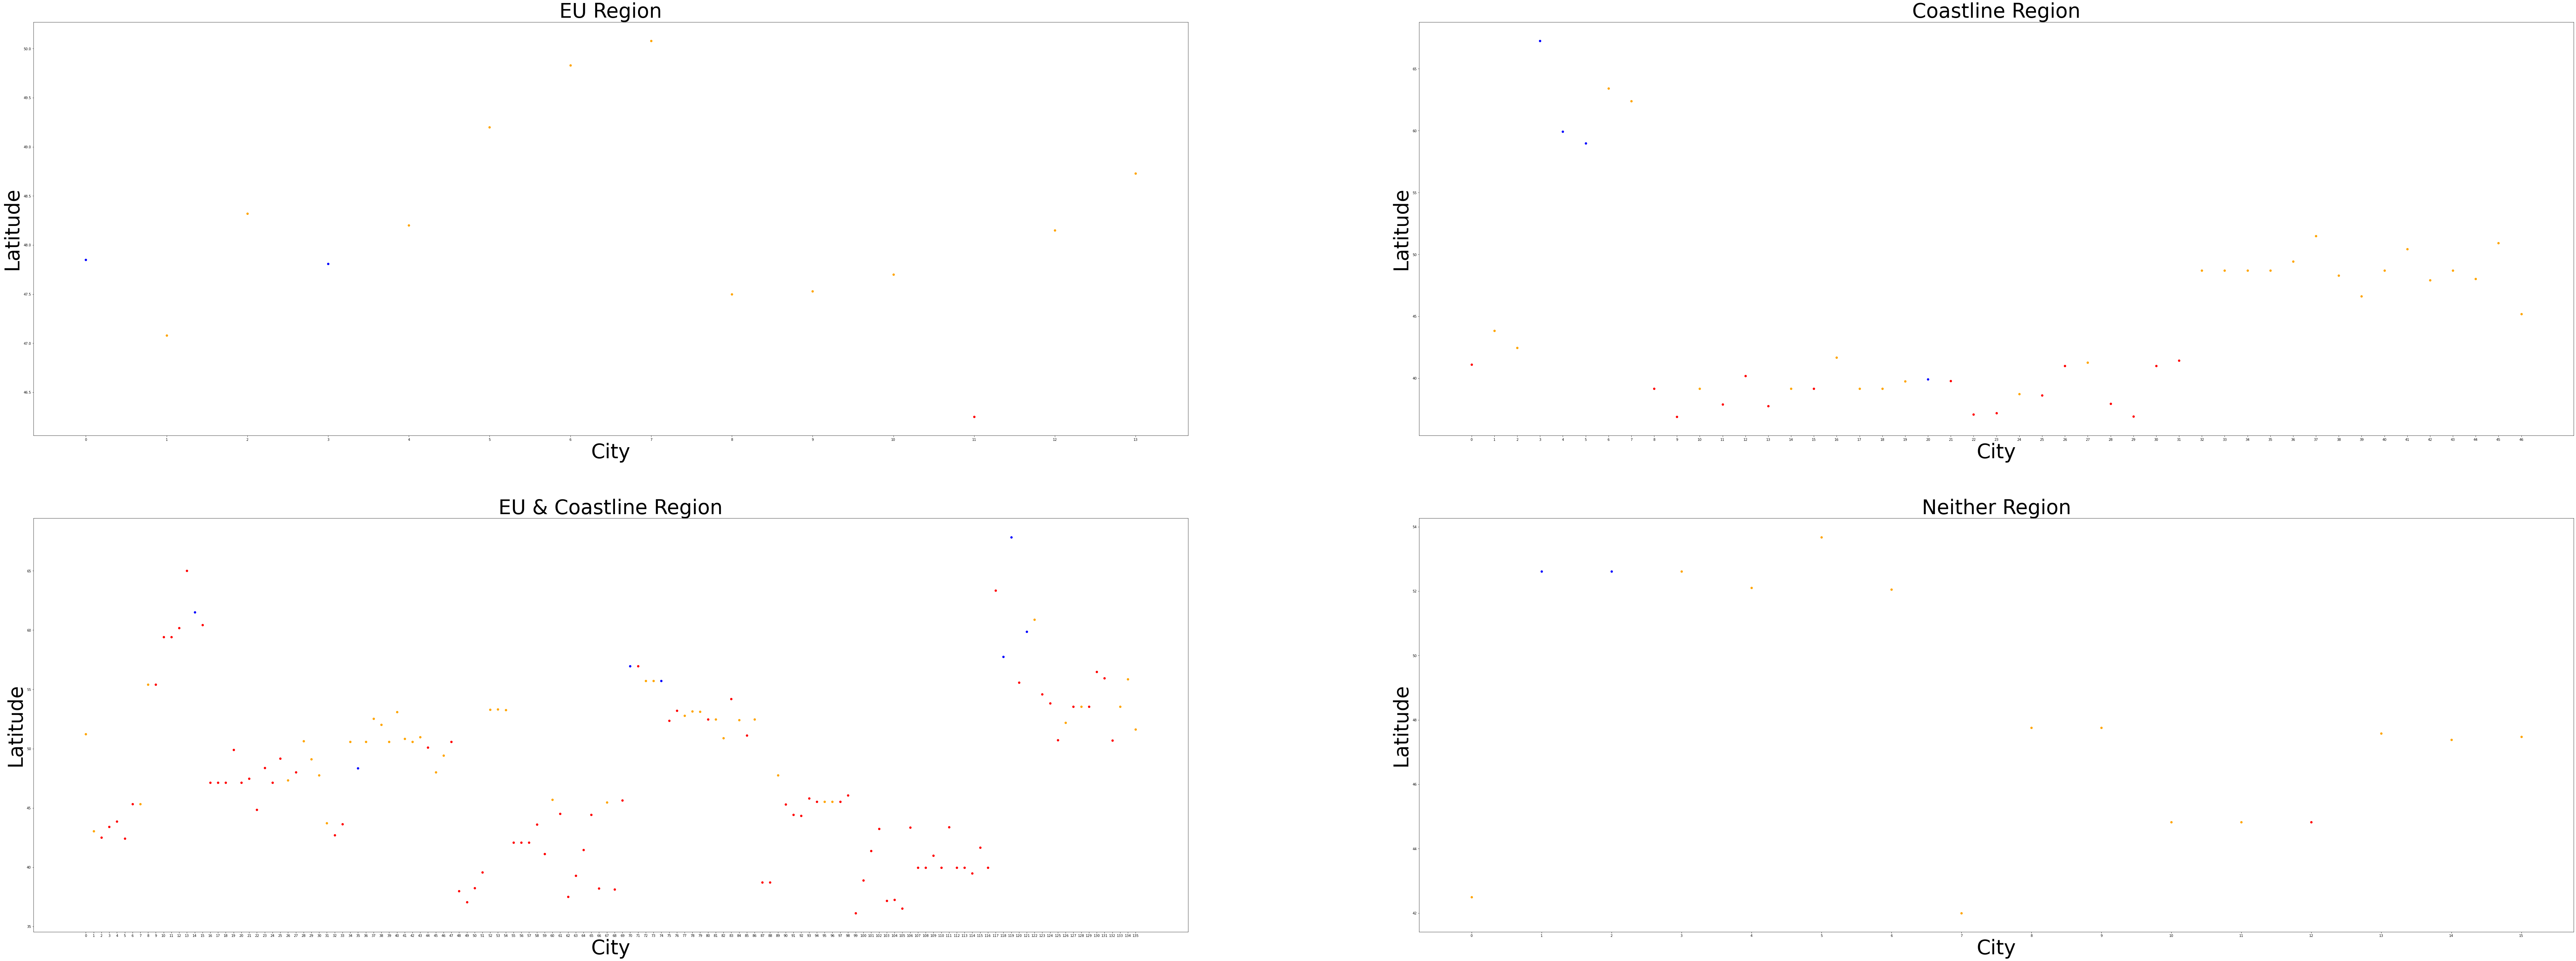

In [22]:
print("#4 [8 pts] Plot subplots (2, 2), with proper titles, one each for the region types described in Preprocessing/Analysis #3 above.")
print("Each subplot should be a scatter plot of Latitude (y-axis) vs. City (x-axis), where the color of the plot points should be based on the temperature values: ‘red’ for temperatures above 10, ‘blue’ for temperatures below 6 and ‘orange for temperatures between 6 and 10 (both inclusive). For each subplot, set xticks to an array of numbers from 0 to n-1 (both inclusive), where n is the total number of cities in each region type. This represents each city as a number between 0 and n-1.")
def pickColor(t):
    if(t > 10):
        return 'red'
    elif(t < 6):
        return 'blue'
    else:
        return 'orange'

def subplotFunc(data, name,chart):
    x = [i for i in range(len(data['city'].values))]
    y = data['latitude'].values
    colors = [pickColor(temp) for temp in data['temperature'].values]
    for xCoord,yCoord,color in zip(x,y,colors):
        chart.scatter(xCoord,yCoord,c=color)
    chart.set_xticks(range(0,len(x)))
    chart.set_title(name,fontsize = 60)
    chart.set_xlabel('City',fontsize = 60)
    chart.set_ylabel('Latitude',fontsize = 60)
    
both = tDF.loc[(tDF['EU'] == 'yes') & (tDF['coastline'] == 'yes')]
cLine = tDF.loc[(tDF['EU'] == 'no') & (tDF['coastline'] == 'yes')]
eu = tDF.loc[(tDF['EU'] == 'yes') & (tDF['coastline'] == 'no')]
neither = tDF.loc[(tDF['EU'] == 'no') & (tDF['coastline'] == 'no')]

def getTicks(data):
    return len(data['city'].values)
xDIM = max([getTicks(eu),getTicks(cLine),getTicks(both),getTicks(neither)])
plt.figure(figsize=(xDIM,xDIM/2)) 
fig,axes = plt.subplots(2,2,figsize=(xDIM,50))
subplotFunc(eu,'EU Region',axes[0,0])
subplotFunc(cLine,'Coastline Region',axes[0,1])
subplotFunc(both,'EU & Coastline Region',axes[1,0])
subplotFunc(neither,'Neither Region',axes[1,1])